In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy.stats as stats
import plotly.express as px
from sklearn import preprocessing

In [95]:
df = pd.read_csv("DataSet1_1.csv", sep=';')
df.dtypes

Region     object
N           int64
X1        float64
X2        float64
X3        float64
X4        float64
X5        float64
X6        float64
X7        float64
X8        float64
X9        float64
X10       float64
X11       float64
X12       float64
X13       float64
X14       float64
X15       float64
X16       float64
X17       float64
X18       float64
X19       float64
X20       float64
dtype: object

In [96]:
df

,Region,N,X1,X2,X3,X4,X5,X6,X7,X8,...,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20
0,Белгородская область,1,61.0,66.7,71.5,37.9,31.6,0.9,63.4,31.8,...,29.0,26.4,67.0,39.5,10.8,96.0,64.3,63.2,32.0,89.5
1,Брянская область,2,51.1,67.2,69.4,40.0,30.0,1.9,60.0,20.0,...,18.6,19.1,57.3,56.4,7.7,92.7,57.3,6.6,20.0,87.2
2,Владимирская область,3,66.0,66.8,72.1,41.8,30.0,2.0,69.0,26.5,...,27.2,23.8,72.7,36.5,10.4,92.4,50.5,23.0,25.0,81.1
3,Воронежская область,4,42.9,76.6,79.0,43.7,34.9,1.9,62.2,25.6,...,25.8,23.1,60.4,59.6,5.3,84.1,40.4,14.6,18.0,88.5
4,Ивановская область,5,70.0,63.6,70.3,44.2,33.4,1.4,60.8,22.4,...,25.3,21.5,67.8,49.1,4.5,95.6,44.5,10.6,14.0,83.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Регион 96,96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,Регион 97,97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,Регион 98,98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,Регион 99,99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Очевидно, что регионы после 85 не несут никих данных => удаляем

In [97]:
df = df[df['N'] <= 85]
df

,Region,N,X1,X2,X3,X4,X5,X6,X7,X8,...,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20
0,Белгородская область,1,61.0,66.7,71.5,37.9,31.6,0.9,63.4,31.8,...,29.0,26.4,67.0,39.5,10.8,96.0,64.3,63.2,32.0,89.5
1,Брянская область,2,51.1,67.2,69.4,40.0,30.0,1.9,60.0,20.0,...,18.6,19.1,57.3,56.4,7.7,92.7,57.3,6.6,20.0,87.2
2,Владимирская область,3,66.0,66.8,72.1,41.8,30.0,2.0,69.0,26.5,...,27.2,23.8,72.7,36.5,10.4,92.4,50.5,23.0,25.0,81.1
3,Воронежская область,4,42.9,76.6,79.0,43.7,34.9,1.9,62.2,25.6,...,25.8,23.1,60.4,59.6,5.3,84.1,40.4,14.6,18.0,88.5
4,Ивановская область,5,70.0,63.6,70.3,44.2,33.4,1.4,60.8,22.4,...,25.3,21.5,67.8,49.1,4.5,95.6,44.5,10.6,14.0,83.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Амурская область,81,78.2,65.4,76.3,38.4,27.9,0.8,48.3,18.7,...,14.5,15.3,54.4,34.3,11.2,90.1,48.0,5.2,23.0,68.9
81,Магаданская область,82,74.9,77.7,87.7,43.5,33.8,1.6,48.3,17.6,...,15.2,12.8,46.3,20.0,5.8,92.5,61.2,22.7,21.0,57.4
82,Сахалинская область,83,54.2,71.1,74.6,45.8,36.8,1.1,59.6,21.5,...,19.3,18.7,61.1,40.8,13.9,95.9,67.6,26.8,30.0,86.8
83,Еврейская автономная область,84,54.7,55.3,67.4,39.9,24.9,1.2,52.2,17.7,...,14.6,14.4,59.5,15.2,4.2,86.5,28.8,1.7,15.0,67.6


Поскольку столбец N это просто номера регионов, то определим ее как индекс

In [98]:
df.set_index('N', inplace=True)
df

,Region,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20
N,,,,,,,,,,,,,,,,,,,,,
1,Белгородская область,61.0,66.7,71.5,37.9,31.6,0.9,63.4,31.8,15.5,...,29.0,26.4,67.0,39.5,10.8,96.0,64.3,63.2,32.0,89.5
2,Брянская область,51.1,67.2,69.4,40.0,30.0,1.9,60.0,20.0,10.6,...,18.6,19.1,57.3,56.4,7.7,92.7,57.3,6.6,20.0,87.2
3,Владимирская область,66.0,66.8,72.1,41.8,30.0,2.0,69.0,26.5,14.2,...,27.2,23.8,72.7,36.5,10.4,92.4,50.5,23.0,25.0,81.1
4,Воронежская область,42.9,76.6,79.0,43.7,34.9,1.9,62.2,25.6,15.4,...,25.8,23.1,60.4,59.6,5.3,84.1,40.4,14.6,18.0,88.5
5,Ивановская область,70.0,63.6,70.3,44.2,33.4,1.4,60.8,22.4,10.3,...,25.3,21.5,67.8,49.1,4.5,95.6,44.5,10.6,14.0,83.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,Амурская область,78.2,65.4,76.3,38.4,27.9,0.8,48.3,18.7,8.0,...,14.5,15.3,54.4,34.3,11.2,90.1,48.0,5.2,23.0,68.9
82,Магаданская область,74.9,77.7,87.7,43.5,33.8,1.6,48.3,17.6,9.4,...,15.2,12.8,46.3,20.0,5.8,92.5,61.2,22.7,21.0,57.4
83,Сахалинская область,54.2,71.1,74.6,45.8,36.8,1.1,59.6,21.5,10.2,...,19.3,18.7,61.1,40.8,13.9,95.9,67.6,26.8,30.0,86.8


In [99]:
regions = df.copy()
regions = regions.drop(columns = regions.columns[regions.columns != "Region"])
regions.head()

,Region
N,
1,Белгородская область
2,Брянская область
3,Владимирская область
4,Воронежская область
5,Ивановская область


In [100]:
df = df.drop(columns= "Region")
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20
N,,,,,,,,,,,,,,,,,,,,
1,61.0,66.7,71.5,37.9,31.6,0.9,63.4,31.8,15.5,58.8,29.0,26.4,67.0,39.5,10.8,96.0,64.3,63.2,32.0,89.5
2,51.1,67.2,69.4,40.0,30.0,1.9,60.0,20.0,10.6,42.7,18.6,19.1,57.3,56.4,7.7,92.7,57.3,6.6,20.0,87.2
3,66.0,66.8,72.1,41.8,30.0,2.0,69.0,26.5,14.2,58.1,27.2,23.8,72.7,36.5,10.4,92.4,50.5,23.0,25.0,81.1
4,42.9,76.6,79.0,43.7,34.9,1.9,62.2,25.6,15.4,54.8,25.8,23.1,60.4,59.6,5.3,84.1,40.4,14.6,18.0,88.5
5,70.0,63.6,70.3,44.2,33.4,1.4,60.8,22.4,10.3,53.9,25.3,21.5,67.8,49.1,4.5,95.6,44.5,10.6,14.0,83.1


Построим Violinplot для каждого параметра

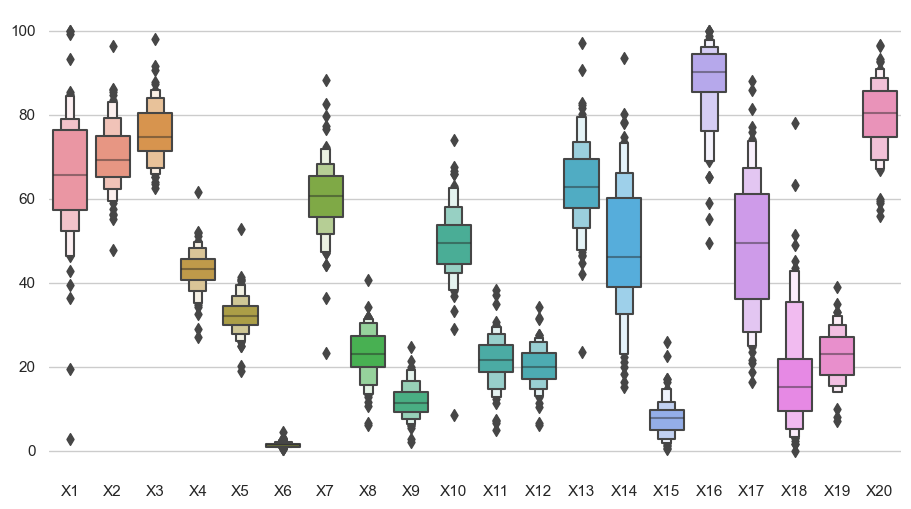

In [101]:
f, ax = plt.subplots(figsize=(11, 6))
sns.boxenplot(data=df)
sns.despine(left=True, bottom=True)

Мало что видно построим qq plot

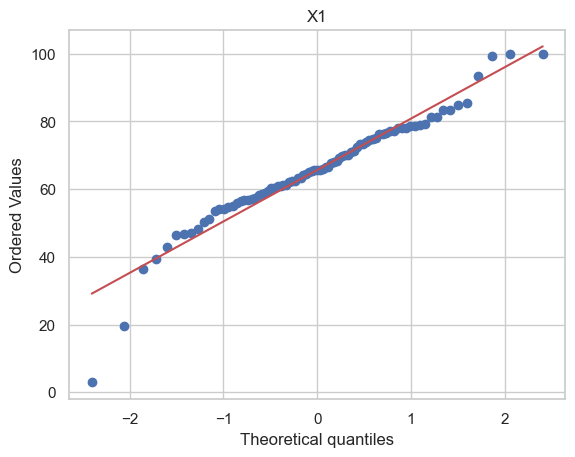

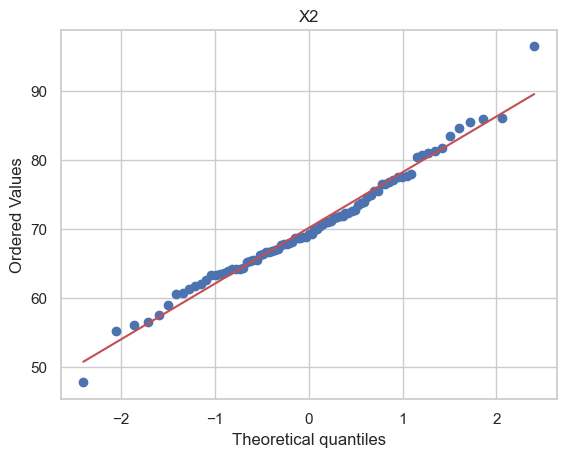

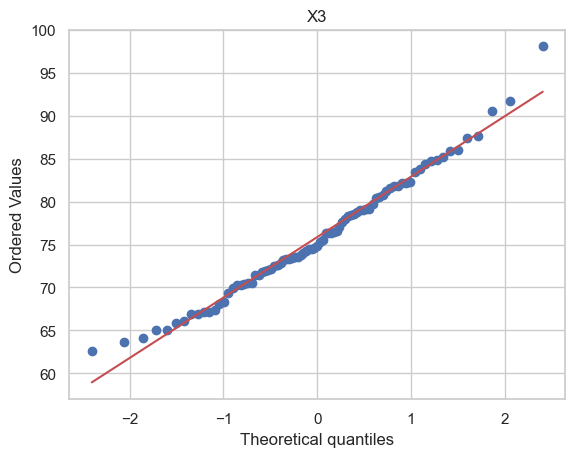

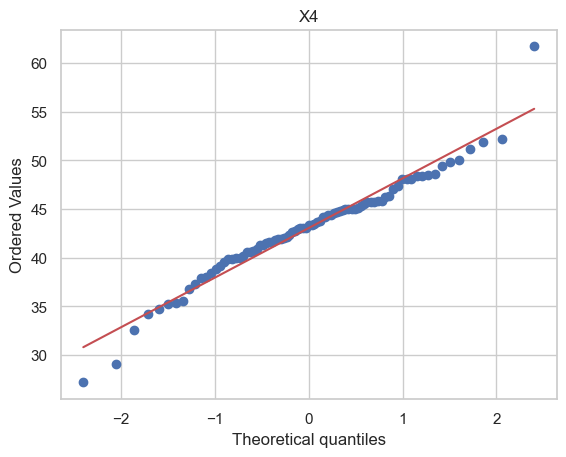

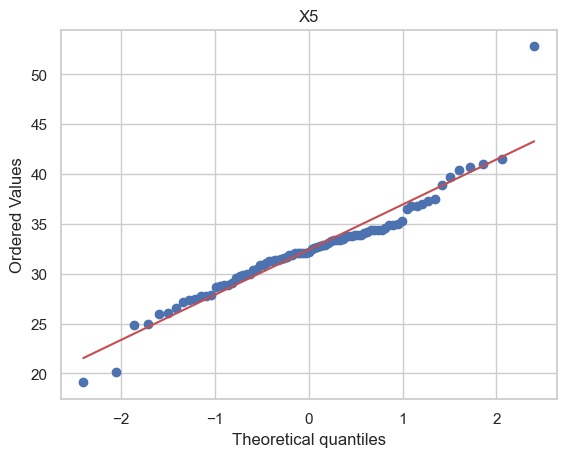

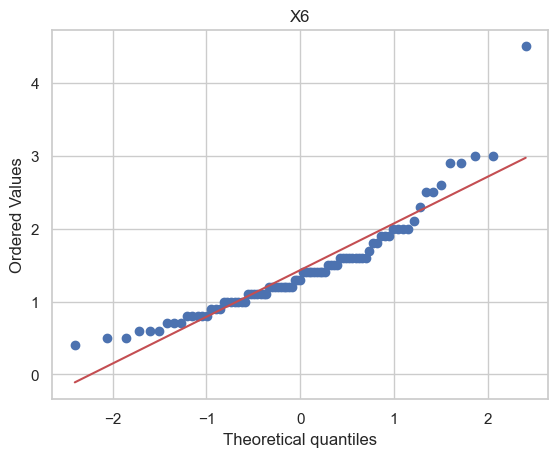

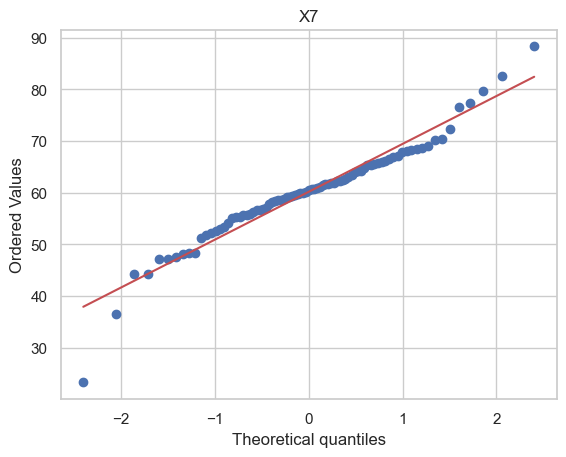

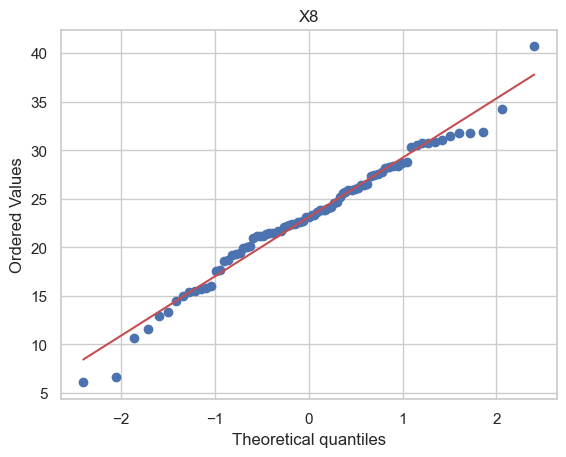

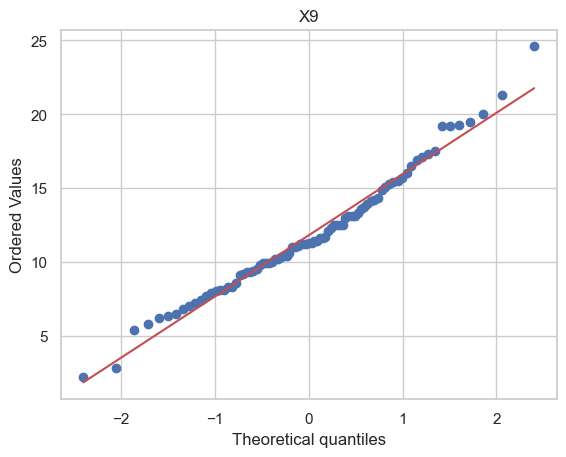

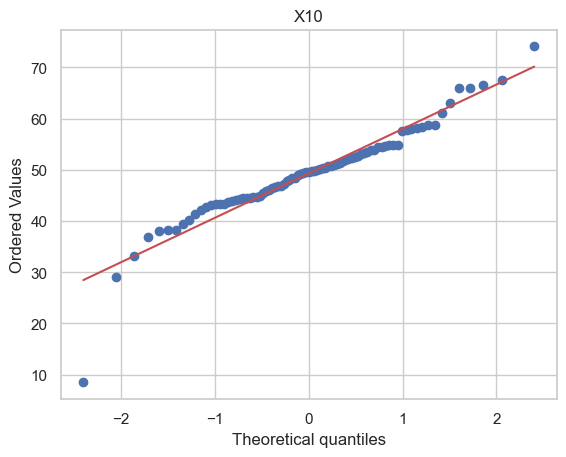

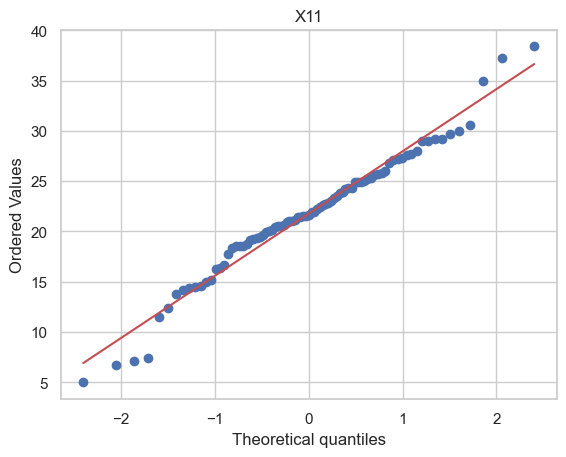

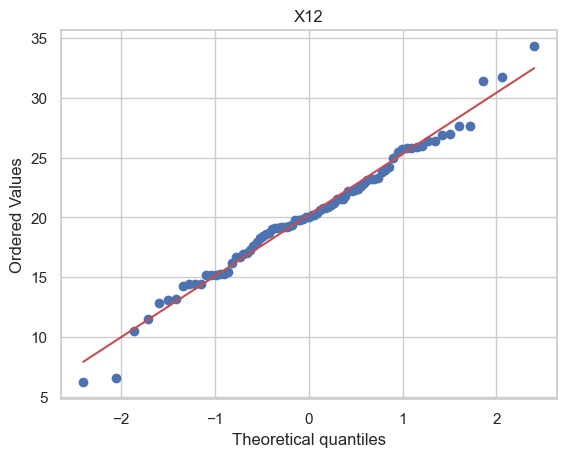

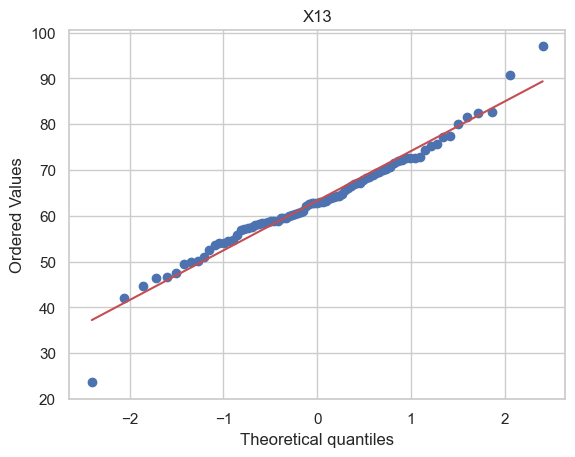

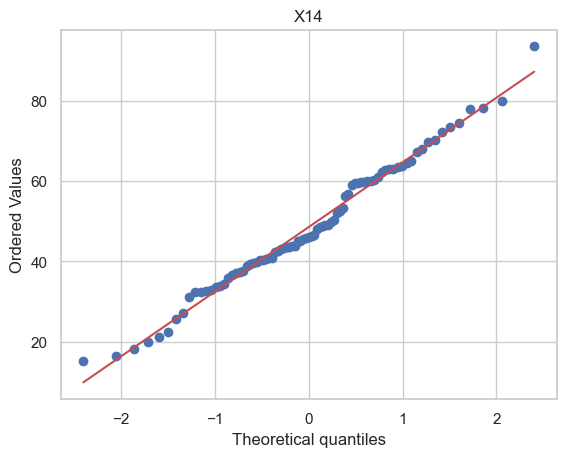

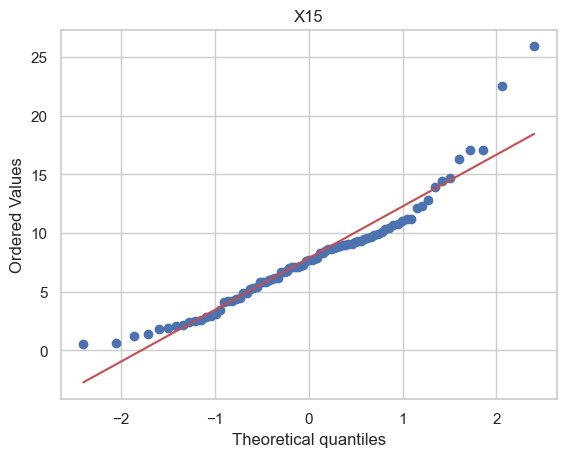

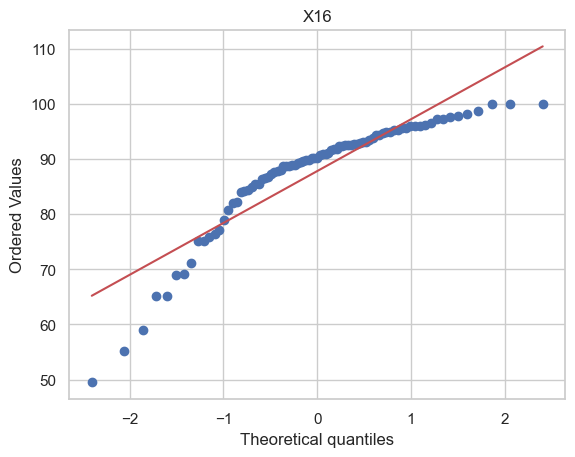

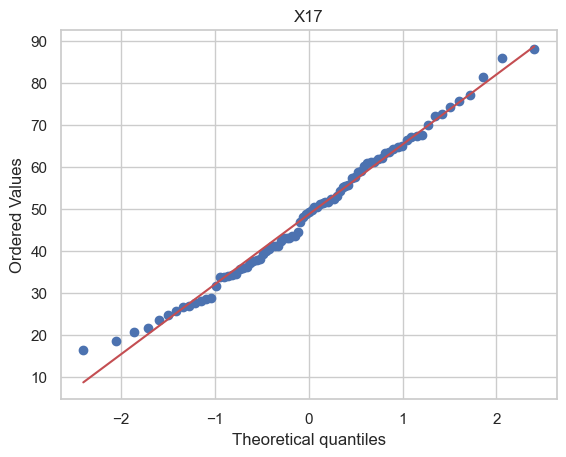

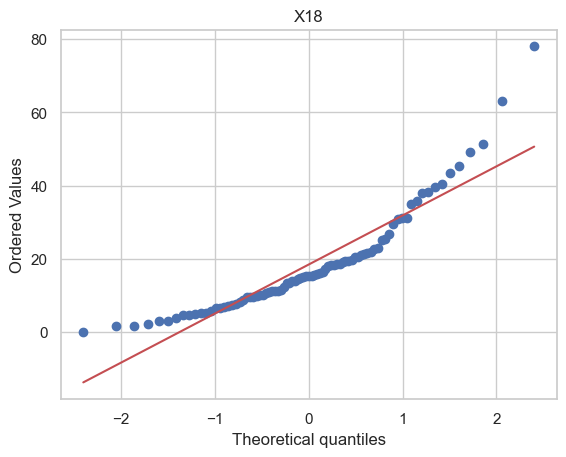

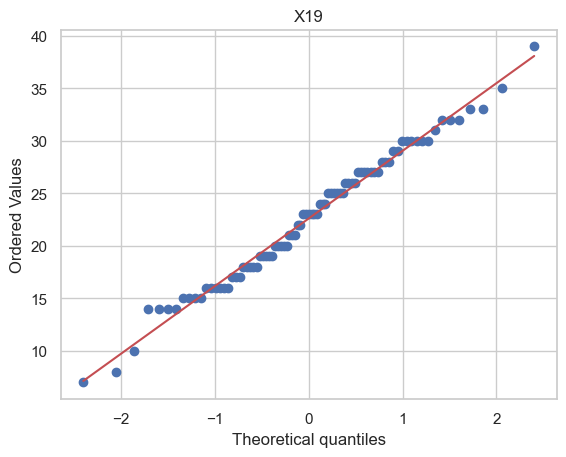

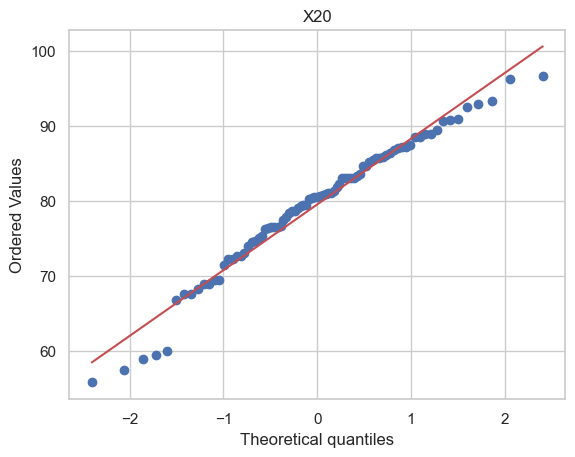

In [102]:
for col in df.columns:
    stats.probplot(df[col], dist="norm", plot=pylab)
    pylab.title(col)
    pylab.show()

Большинство весьма похоже на нормальное распределение, но куча выбросов. Стоит определить, это одни и те же регионы особенные или это разные

In [103]:
test_df = df.copy()
test_df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20
N,,,,,,,,,,,,,,,,,,,,
1,61.0,66.7,71.5,37.9,31.6,0.9,63.4,31.8,15.5,58.8,29.0,26.4,67.0,39.5,10.8,96.0,64.3,63.2,32.0,89.5
2,51.1,67.2,69.4,40.0,30.0,1.9,60.0,20.0,10.6,42.7,18.6,19.1,57.3,56.4,7.7,92.7,57.3,6.6,20.0,87.2
3,66.0,66.8,72.1,41.8,30.0,2.0,69.0,26.5,14.2,58.1,27.2,23.8,72.7,36.5,10.4,92.4,50.5,23.0,25.0,81.1
4,42.9,76.6,79.0,43.7,34.9,1.9,62.2,25.6,15.4,54.8,25.8,23.1,60.4,59.6,5.3,84.1,40.4,14.6,18.0,88.5
5,70.0,63.6,70.3,44.2,33.4,1.4,60.8,22.4,10.3,53.9,25.3,21.5,67.8,49.1,4.5,95.6,44.5,10.6,14.0,83.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,78.2,65.4,76.3,38.4,27.9,0.8,48.3,18.7,8.0,38.0,14.5,15.3,54.4,34.3,11.2,90.1,48.0,5.2,23.0,68.9
82,74.9,77.7,87.7,43.5,33.8,1.6,48.3,17.6,9.4,43.9,15.2,12.8,46.3,20.0,5.8,92.5,61.2,22.7,21.0,57.4
83,54.2,71.1,74.6,45.8,36.8,1.1,59.6,21.5,10.2,50.7,19.3,18.7,61.1,40.8,13.9,95.9,67.6,26.8,30.0,86.8


In [104]:
test_df = test_df[test_df["X20"] > 64]
test_df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20
N,,,,,,,,,,,,,,,,,,,,
1,61.0,66.7,71.5,37.9,31.6,0.9,63.4,31.8,15.5,58.8,29.0,26.4,67.0,39.5,10.8,96.0,64.3,63.2,32.0,89.5
2,51.1,67.2,69.4,40.0,30.0,1.9,60.0,20.0,10.6,42.7,18.6,19.1,57.3,56.4,7.7,92.7,57.3,6.6,20.0,87.2
3,66.0,66.8,72.1,41.8,30.0,2.0,69.0,26.5,14.2,58.1,27.2,23.8,72.7,36.5,10.4,92.4,50.5,23.0,25.0,81.1
4,42.9,76.6,79.0,43.7,34.9,1.9,62.2,25.6,15.4,54.8,25.8,23.1,60.4,59.6,5.3,84.1,40.4,14.6,18.0,88.5
5,70.0,63.6,70.3,44.2,33.4,1.4,60.8,22.4,10.3,53.9,25.3,21.5,67.8,49.1,4.5,95.6,44.5,10.6,14.0,83.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,62.2,72.3,81.3,48.4,33.4,1.4,61.6,22.6,11.6,54.6,23.0,22.4,63.9,25.5,8.7,90.2,52.3,13.9,27.0,80.5
81,78.2,65.4,76.3,38.4,27.9,0.8,48.3,18.7,8.0,38.0,14.5,15.3,54.4,34.3,11.2,90.1,48.0,5.2,23.0,68.9
83,54.2,71.1,74.6,45.8,36.8,1.1,59.6,21.5,10.2,50.7,19.3,18.7,61.1,40.8,13.9,95.9,67.6,26.8,30.0,86.8


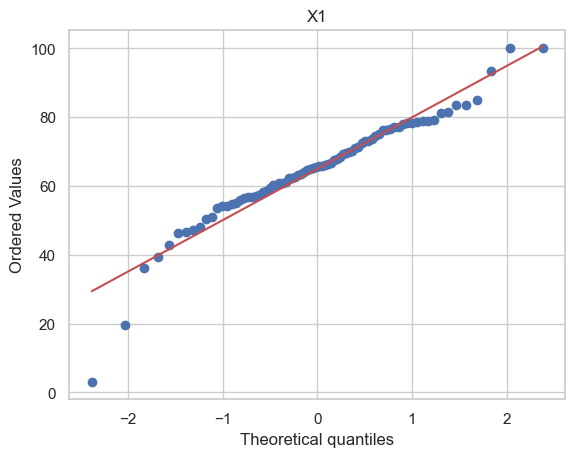

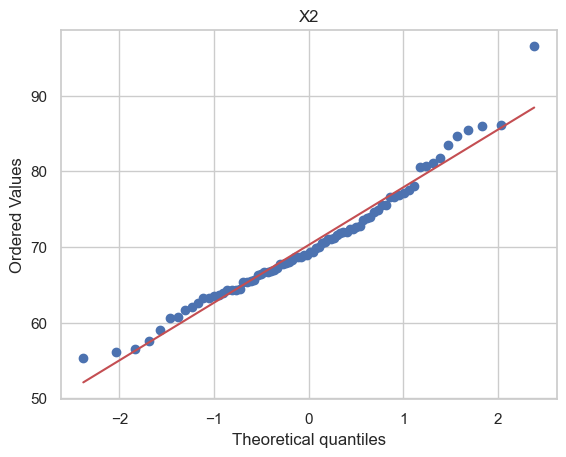

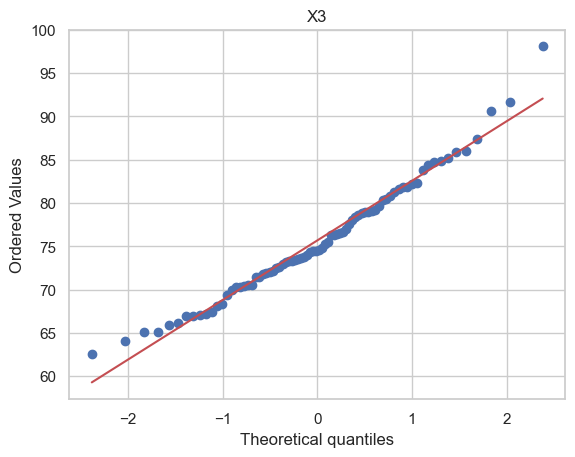

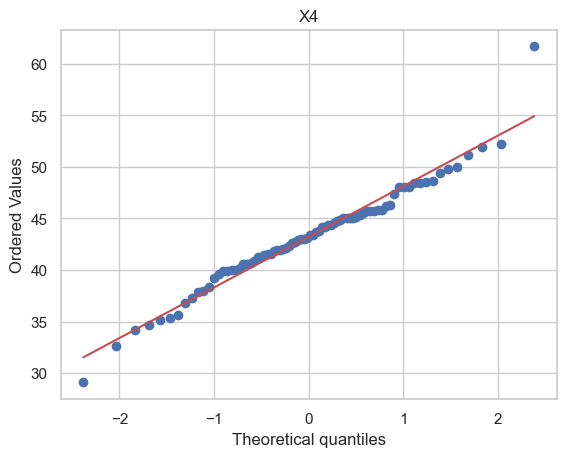

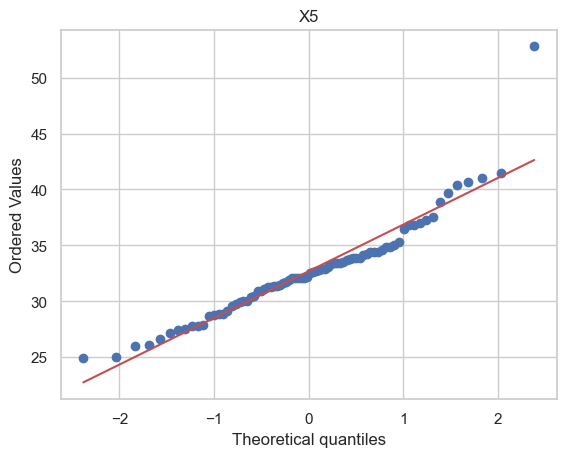

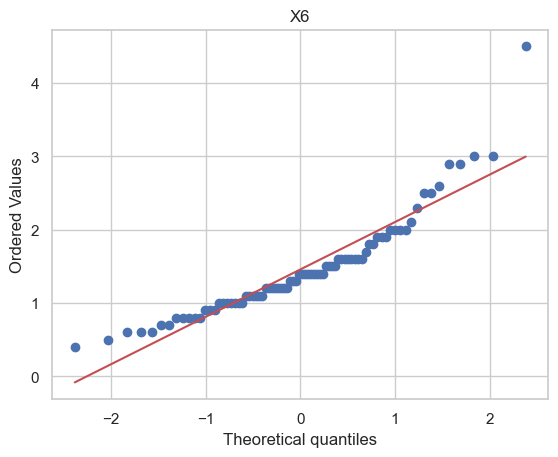

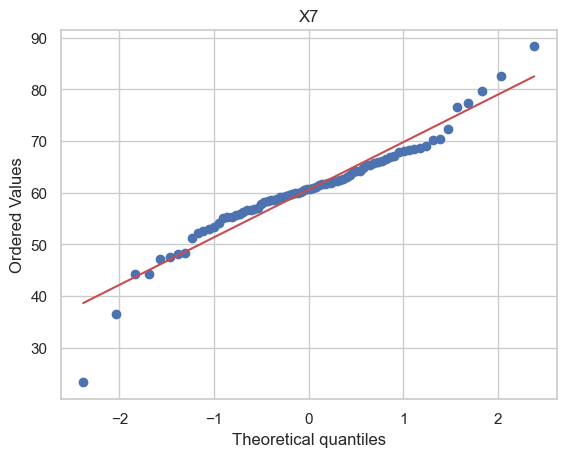

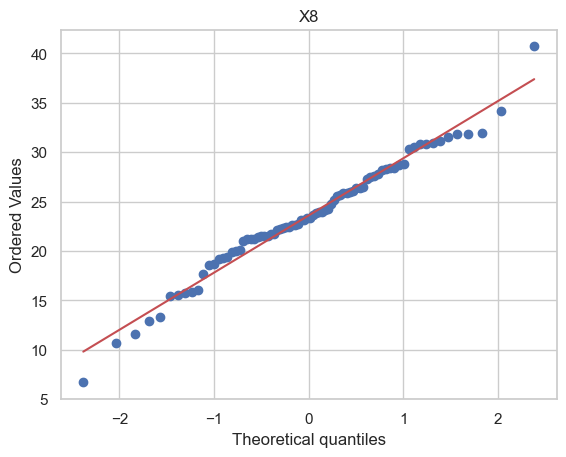

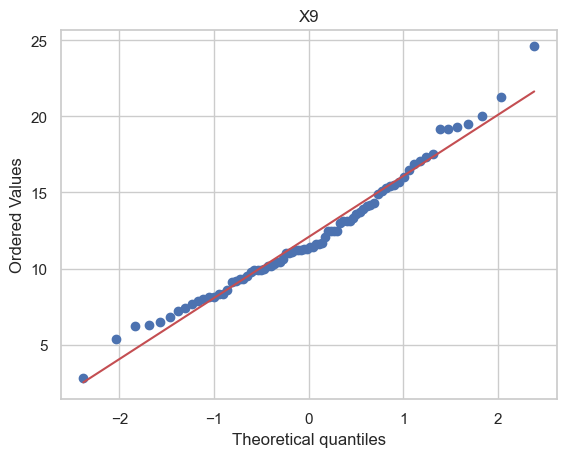

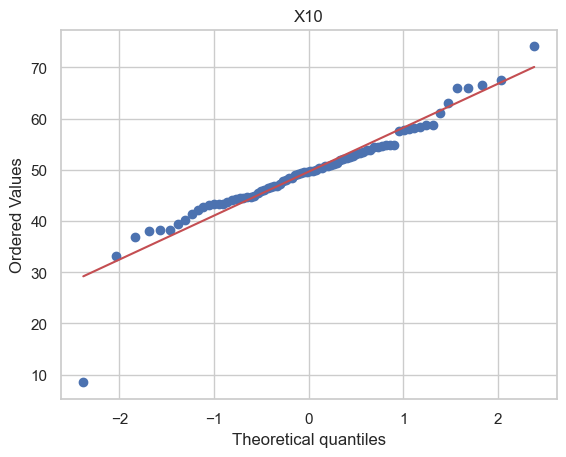

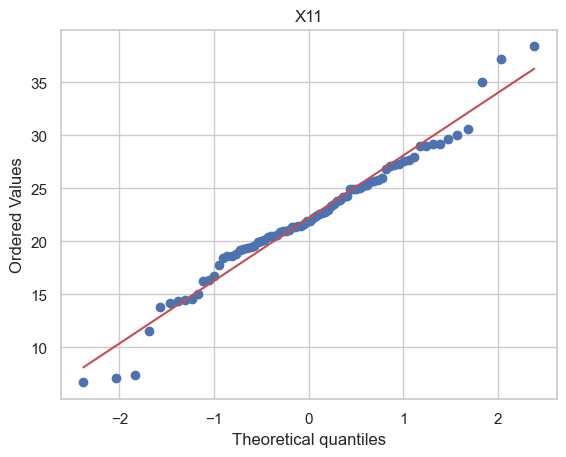

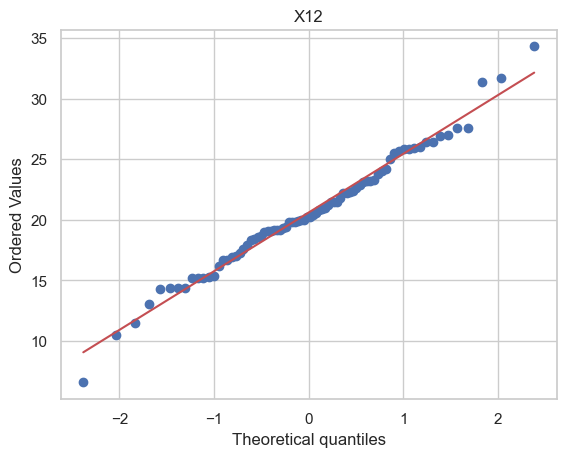

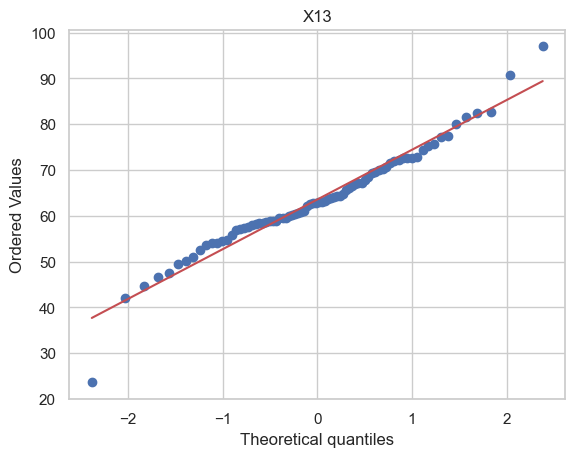

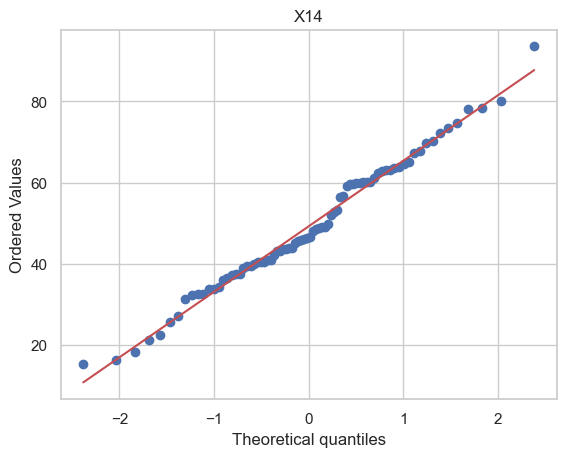

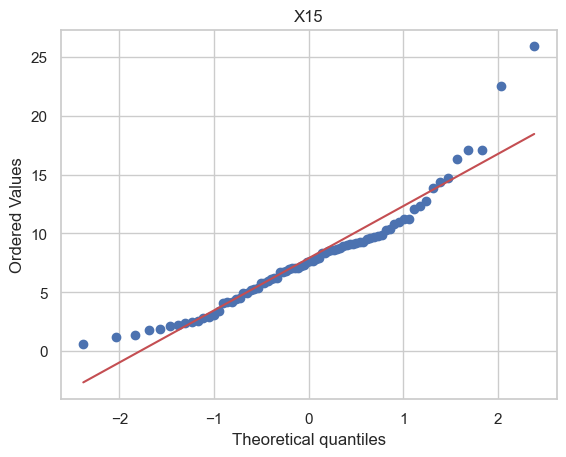

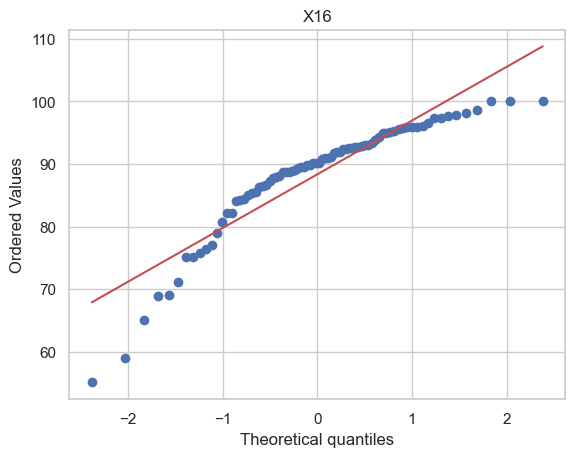

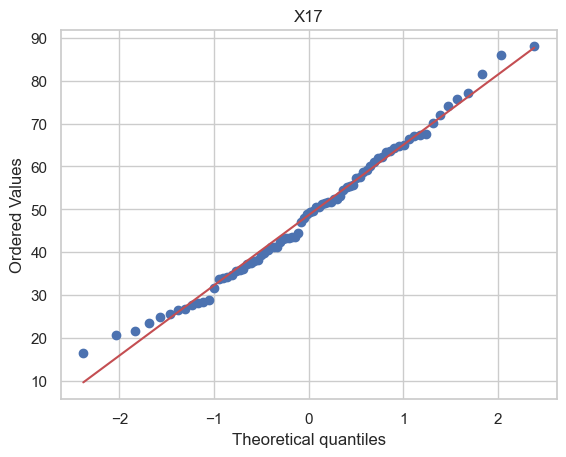

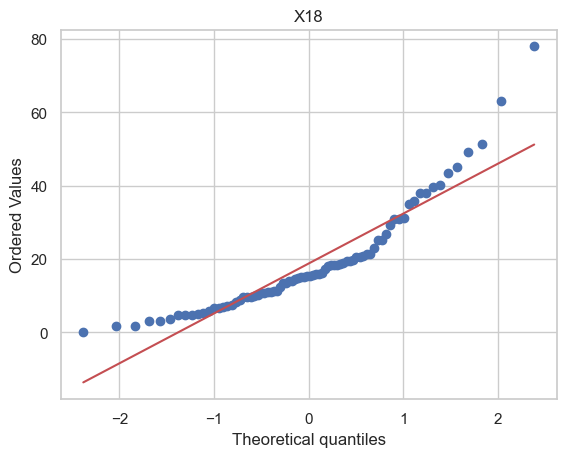

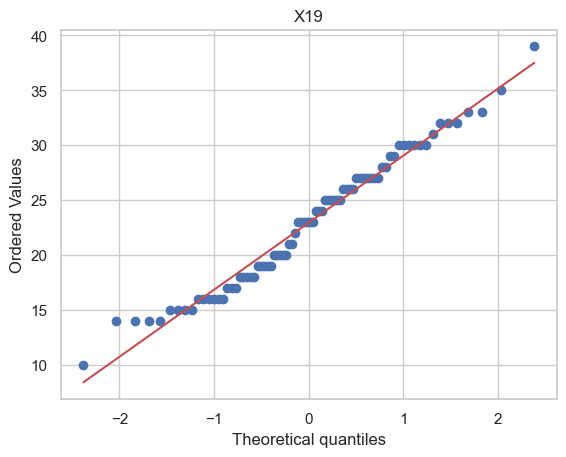

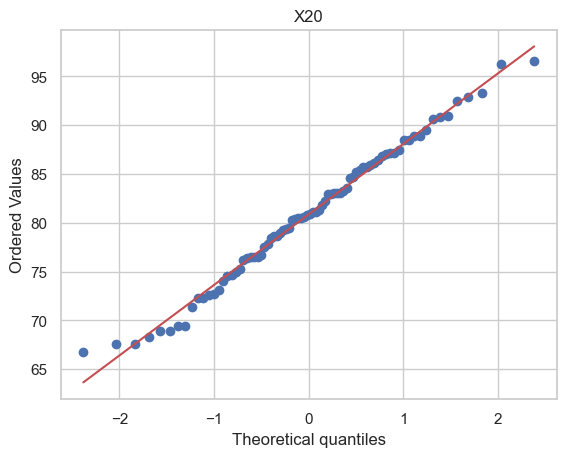

In [105]:
for col in df.columns:
    stats.probplot(test_df[col], dist="norm", plot=pylab)
    pylab.title(col)
    pylab.show()

In [116]:
test_df = df.copy()
for col in test_df.columns:
    test_df[col] = preprocessing.normalize([test_df[col]]).T
test_df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20
N,,,,,,,,,,,,,,,,,,,,
1,0.098133,0.102420,0.101784,0.094827,0.104708,0.061776,0.112933,0.144335,0.134584,0.127312,0.139013,0.137557,0.113187,0.083884,0.129423,0.117798,0.135732,0.295167,0.147816,0.121328
2,0.082206,0.103187,0.098794,0.100081,0.099407,0.130416,0.106877,0.090777,0.092038,0.092453,0.089160,0.099520,0.096801,0.119774,0.092274,0.113748,0.120955,0.030824,0.092385,0.118210
3,0.106176,0.102573,0.102638,0.104585,0.099407,0.137280,0.122908,0.120279,0.123296,0.125797,0.130384,0.124010,0.122817,0.077514,0.124630,0.113380,0.106601,0.107418,0.115481,0.109941
4,0.069015,0.117621,0.112460,0.109339,0.115643,0.130416,0.110796,0.116194,0.133716,0.118651,0.123673,0.120362,0.102038,0.126570,0.063513,0.103196,0.085281,0.068187,0.083146,0.119973
5,0.112611,0.097660,0.100075,0.110590,0.110673,0.096096,0.108302,0.101670,0.089433,0.116703,0.121276,0.112026,0.114539,0.104272,0.053926,0.117307,0.093936,0.049506,0.064669,0.112652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,0.125803,0.100423,0.108617,0.096078,0.092448,0.054912,0.086036,0.084876,0.069463,0.082277,0.069506,0.079721,0.091901,0.072841,0.134217,0.110558,0.101324,0.024286,0.106243,0.093403
82,0.120494,0.119310,0.124845,0.108838,0.111998,0.109824,0.086036,0.079884,0.081619,0.095051,0.072862,0.066694,0.078218,0.042473,0.069505,0.113503,0.129188,0.106017,0.097004,0.077813
83,0.087193,0.109176,0.106197,0.114593,0.121939,0.075504,0.106164,0.097585,0.088565,0.109774,0.092515,0.097436,0.103220,0.086645,0.166573,0.117675,0.142698,0.125166,0.138577,0.117668


In [140]:
for col in test_df.columns[test_df.columns != "X1"]:
    test_df["X1"].mul(test_df[col])
test_df = test_df.drop(columns=test_df.columns[test_df.columns != "X1"])
test_df = test_df.sort_values("X1", ascending=False)
regions.loc[list(test_df.head().index)]

,Region
N,
43,Чеченская Республика
39,Республика Ингушетия
38,Республика Дагестан
67,Республика Тыва
78,Камчатский край


In [141]:
regions.loc[list(test_df.tail().index)]

,Region
N,
4,Воронежская область
42,Республика Северная Осетия
63,Тюменская область без АО
29,г. Санкт-Петербург
18,г. Москва


In [152]:
test_df.reset_index().loc[test_df.reset_index()["N"] == regions.loc[regions["Region"] == "Пермский Край"].index[0]]

,N,X1
64,51,0.091859
